# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing Necessary Libraries**

In [106]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [107]:
# Importing the file porter_data_1.csv
df = pd.read_csv('/content/drive/MyDrive/Upgrad 2025-2027/Machine Learning/Linear Regression/Assignment/porter_data_1.csv')
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [109]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [111]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique | dtype: {df[col].dtype}")

market_id: 6 unique | dtype: float64
created_at: 162649 unique | dtype: datetime64[ns]
actual_delivery_time: 160344 unique | dtype: datetime64[ns]
store_primary_category: 73 unique | dtype: int64
order_protocol: 7 unique | dtype: float64
total_items: 54 unique | dtype: int64
subtotal: 8182 unique | dtype: int64
num_distinct_items: 20 unique | dtype: int64
min_item_price: 2251 unique | dtype: int64
max_item_price: 2585 unique | dtype: int64
total_onshift_dashers: 172 unique | dtype: float64
total_busy_dashers: 158 unique | dtype: float64
total_outstanding_orders: 281 unique | dtype: float64
distance: 1318 unique | dtype: float64


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [112]:
# Convert categorical features to category type
categorical_cols = ['order_protocol', 'market_id', 'store_primary_category']
for col in categorical_cols:
    df[col] = df[col].astype('category')
    print(f"{col}: {df[col].nunique()} unique | dtype: {df[col].dtype}")

order_protocol: 7 unique | dtype: category
market_id: 6 unique | dtype: category
store_primary_category: 73 unique | dtype: category


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [114]:
# Calculate time taken in minutes
df['delivery_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_minutes  
0                      21.0     34.44              47.0  
1                       2.0     27.60              44.0  
2                      18.0     11.56              55.0  
3                       8.0     31.80              59.0  
4                       7.0      8.20              46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [115]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_hour'] = df['created_at'].dt.hour
df['order_day'] = df['created_at'].dt.dayofweek  # Monday=0, Sunday=6

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['order_day'].apply(lambda x: 1 if x >= 5 else 0).astype('category')


In [116]:
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_minutes  order_hour  \
0                      21.0     34.44              47.0          22   
1                       2.0     27.60              44.0          21   
2                      18.0     11.56              55.0           0   
3                       8.0     31.80              59.0           3   
4                       7.0      8.20              46.0           2   

   order_day isWeekend  
0          4         0  
1          1         0  
2          0         0  
3          3         0  
4          1         0

In [117]:
# Drop unnecessary columns
df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [118]:
# Define target variable (y) and features (X)
target = 'delivery_minutes'
features = df.drop(columns=[target]).select_dtypes(include=['number', 'category']).columns.tolist()

X = df[features]
y = df[target]

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [119]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

# 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [120]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include='category').columns.tolist()

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

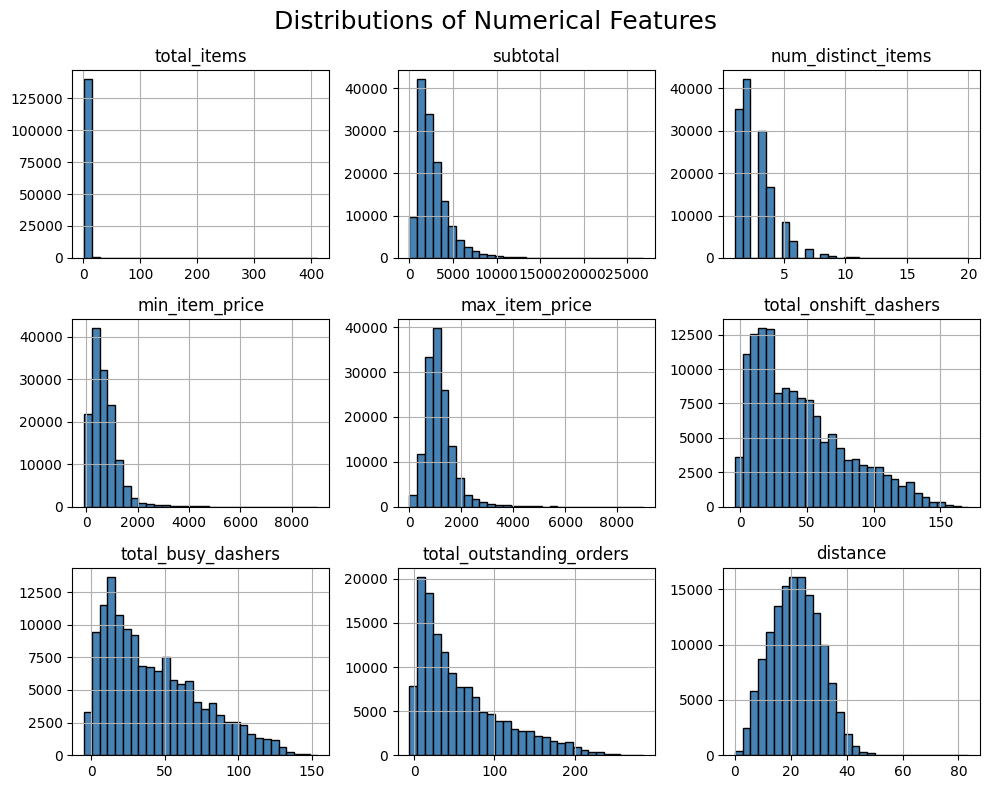

In [121]:
# Plot distributions for all numerical columns
X_train[numerical_cols].hist(figsize=(10, 8), bins=30, edgecolor='black', color='steelblue')
plt.suptitle('Distributions of Numerical Features', fontsize=18)
plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

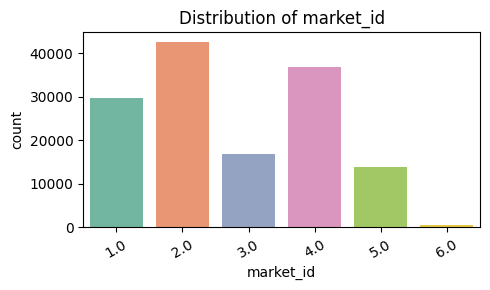

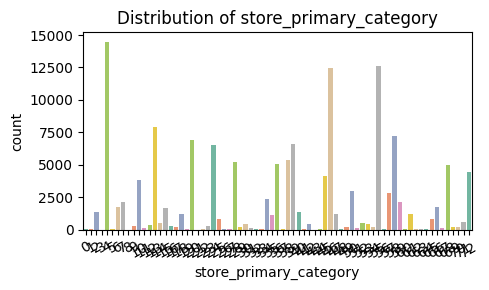

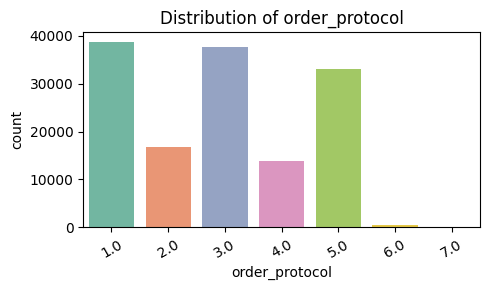

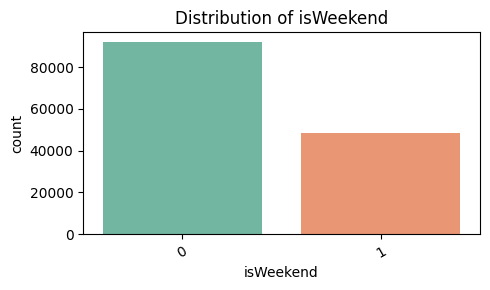

In [122]:
# Distribution of categorical columns

for col in categorical_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=X_train[col], palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

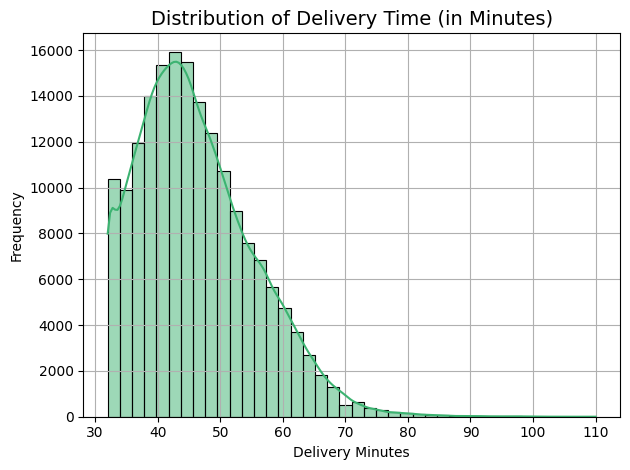

In [68]:
# Distribution of time_taken

sns.histplot(df['delivery_minutes'], kde=True, bins=40, color='mediumseagreen', edgecolor='black')
plt.title("Distribution of Delivery Time (in Minutes)", fontsize=14)
plt.xlabel("Delivery Minutes")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

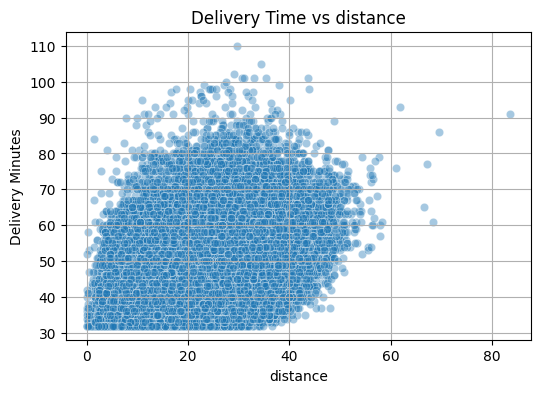

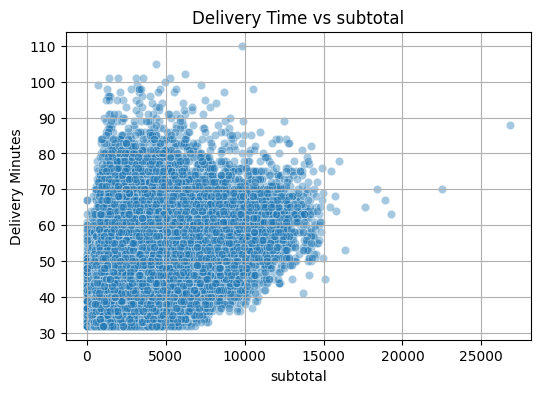

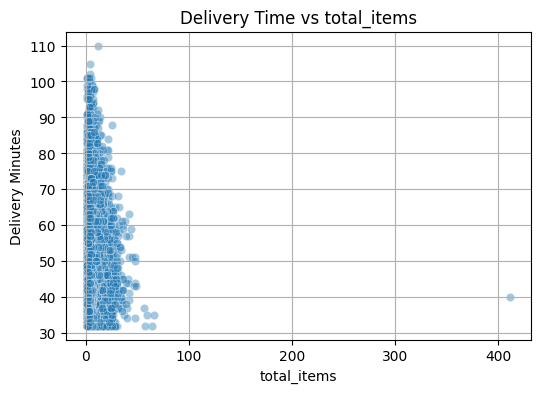

In [69]:
# Scatter plot to visualise the relationship between time_taken and other features

important_cols = ['distance', 'subtotal', 'total_items']

for col in important_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.4)
    plt.title(f'Delivery Time vs {col}')
    plt.xlabel(col)
    plt.ylabel("Delivery Minutes")
    plt.grid(True)
    plt.show()


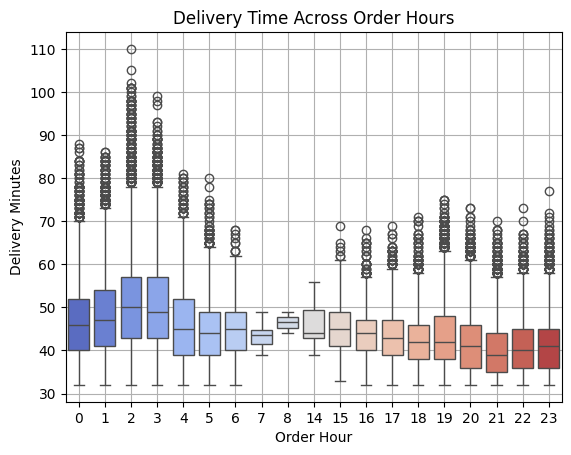

In [70]:
# Show the distribution of time_taken for different hours

# Boxplot of delivery time by order hour
sns.boxplot(x=X_train['order_hour'], y=y_train, palette='coolwarm')
plt.title("Delivery Time Across Order Hours")
plt.xlabel("Order Hour")
plt.ylabel("Delivery Minutes")
plt.grid(True)
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

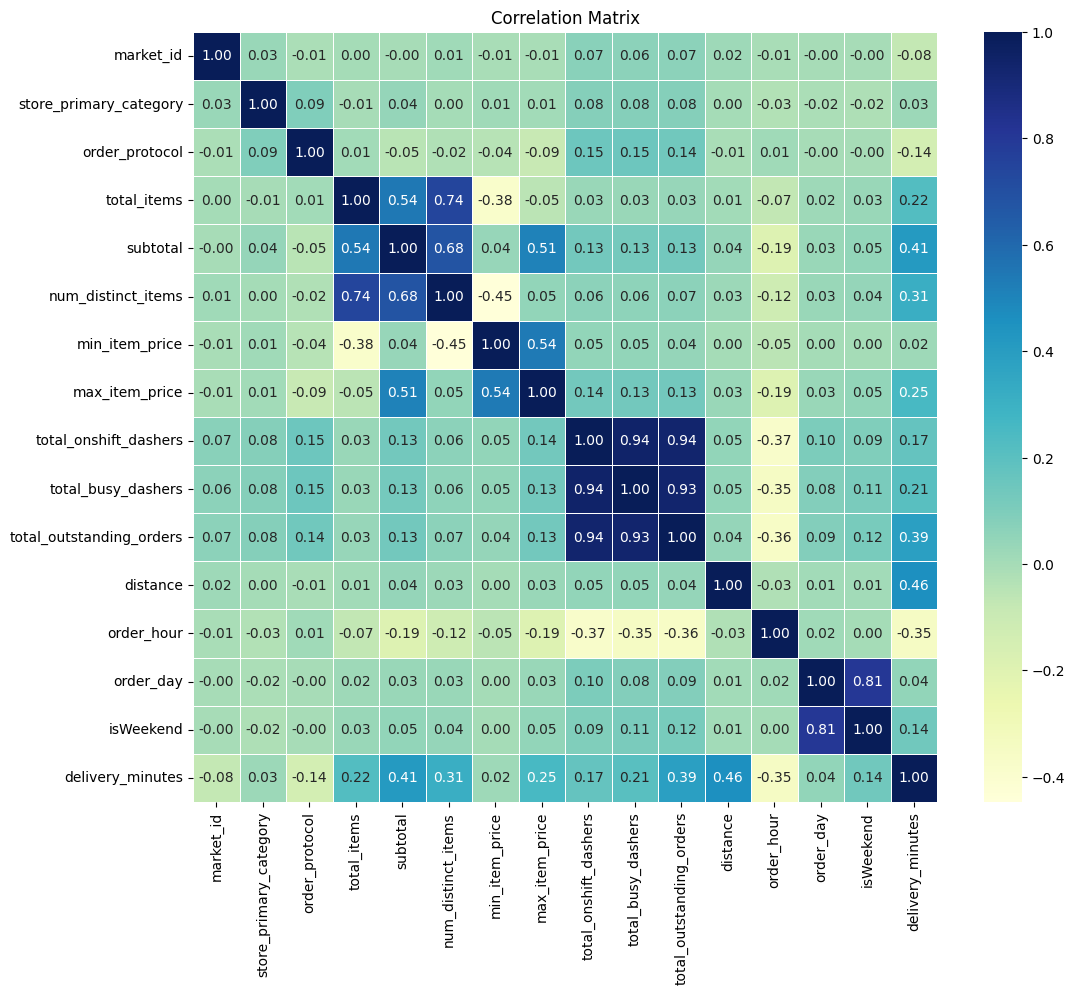

In [71]:
# Plot the heatmap of the correlation matrix

# Correlation heatmap with target
train_df = X_train.copy()
train_df['delivery_minutes'] = y_train

corr = train_df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [72]:
# Drop 3-5 weakly correlated columns from training dataset
weak_cols = corr['delivery_minutes'][abs(corr['delivery_minutes']) < 0.05].index.tolist()
X_train.drop(columns=weak_cols, inplace=True)
X_test.drop(columns=weak_cols, inplace=True)
print("Dropped weakly correlated features:", weak_cols)


Dropped weakly correlated features: ['store_primary_category', 'min_item_price', 'order_day']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

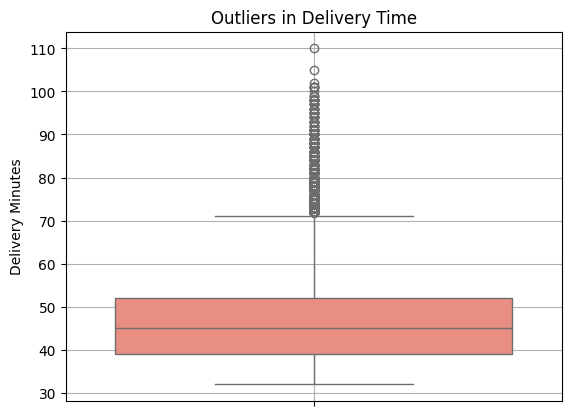

In [73]:
# Boxplot for time_taken

# Boxplot of target
sns.boxplot(y=y_train, color='salmon')
plt.title("Outliers in Delivery Time")
plt.ylabel("Delivery Minutes")
plt.grid(True)
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [74]:
# Handle outliers

def remove_outliers(df, cols, threshold=0.99):
    for col in cols:
        upper_limit = df[col].quantile(threshold)
        df = df[df[col] <= upper_limit]
    return df

# Redefine numerical columns after dropping weakly correlated features
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

train_df = X_train.copy()
train_df['delivery_minutes'] = y_train
train_df = remove_outliers(train_df, numerical_cols + ['delivery_minutes'])

y_train = train_df['delivery_minutes']
X_train = train_df.drop(columns=['delivery_minutes'])

print(f"Updated training set size after outlier removal: {X_train.shape}")

Updated training set size after outlier removal: (129136, 12)


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [75]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols_val = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols_val = X_test.select_dtypes(include='category').columns.tolist()

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

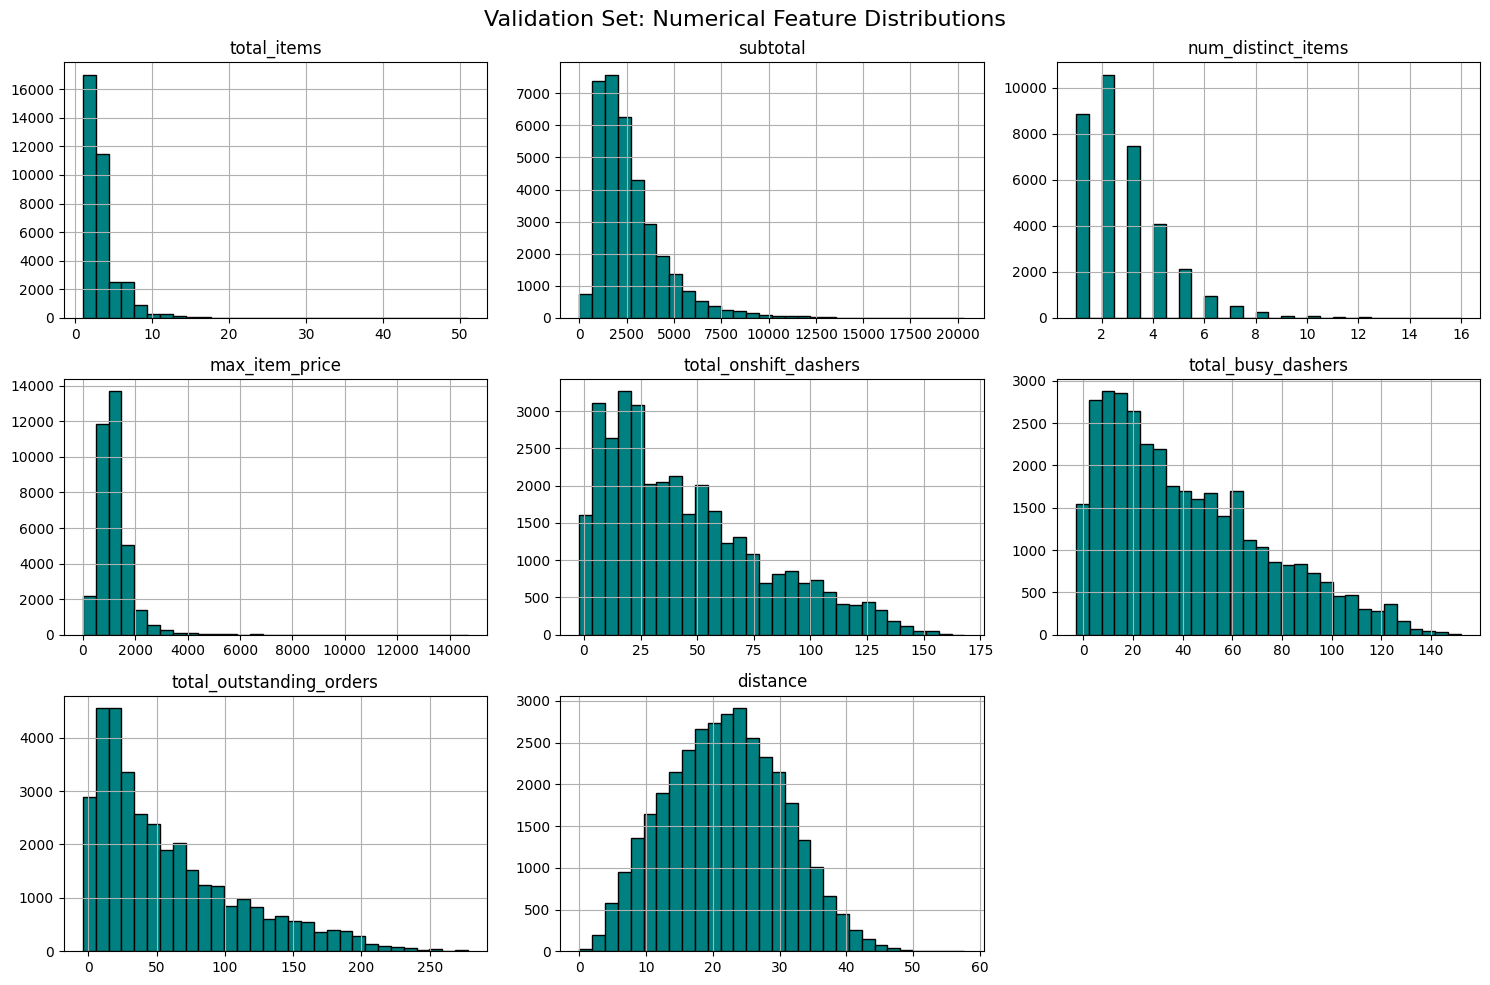

In [76]:
# Plot distributions for all numerical columns

X_test[numerical_cols_val].hist(bins=30, figsize=(15, 10), edgecolor='black', color='teal')
plt.suptitle('Validation Set: Numerical Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

##### **4.1.2**
Check the distribution of categorical features

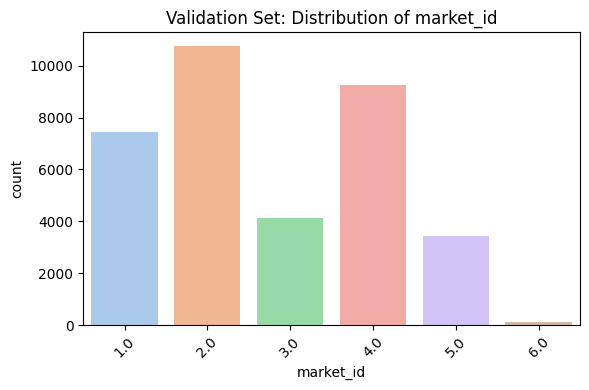

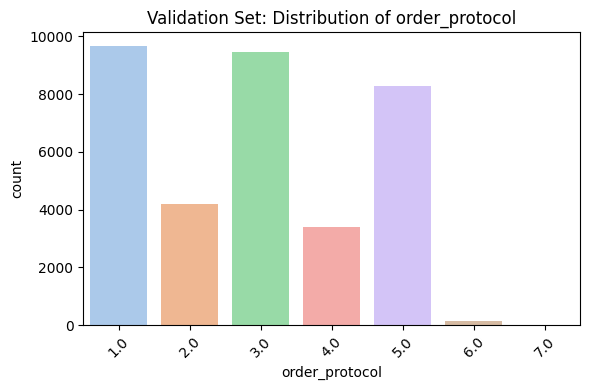

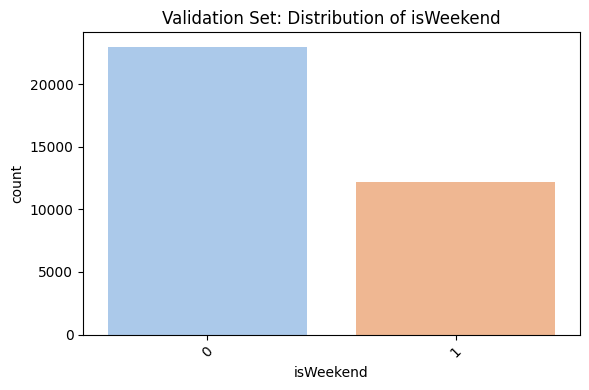

In [77]:
# Distribution of categorical columns

for col in categorical_cols_val:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=X_test, x=col, palette='pastel')
    plt.title(f'Validation Set: Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

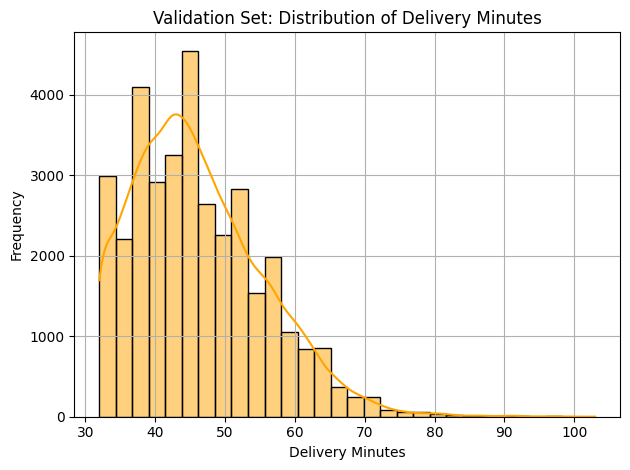

In [78]:
# Distribution of time_taken

sns.histplot(y_test, kde=True, bins=30, color='orange')
plt.title("Validation Set: Distribution of Delivery Minutes")
plt.xlabel("Delivery Minutes")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

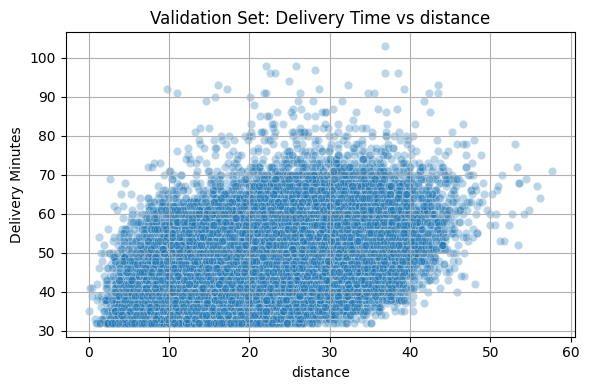

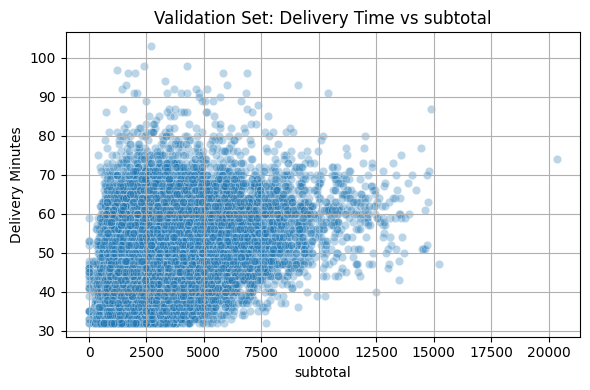

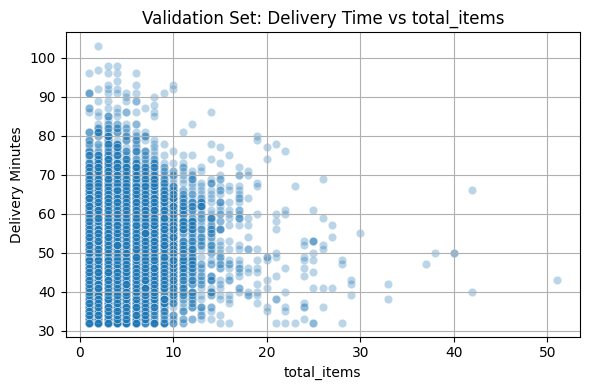

In [79]:
# Scatter plot to visualise the relationship between time_taken and other features

# Scatter plots for numeric features vs time_taken
important_features = ['distance', 'subtotal', 'total_items']  # adjust if needed

for col in important_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_test[col], y=y_test, alpha=0.3)
    plt.title(f'Validation Set: Delivery Time vs {col}')
    plt.xlabel(col)
    plt.ylabel('Delivery Minutes')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [80]:
# Drop the weakly correlated columns from training dataset

# Join features and target
val_df = X_test.copy()
val_df['delivery_minutes'] = y_test

# Correlation
corr_val = val_df.corr()

# Drop columns with abs(corr) < 0.05
weak_cols_val = corr_val['delivery_minutes'][abs(corr_val['delivery_minutes']) < 0.05].index.tolist()
X_test.drop(columns=weak_cols_val, inplace=True)

#print("Dropped from validation set:", weak_cols_val)

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [81]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [82]:
# Apply scaling to the numerical columns
# Identify numerical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Apply Standard Scaling
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [83]:
# Create/Initialise the model
linreg = LinearRegression()

In [84]:
# Train the model using the training data
linreg.fit(X_train, y_train)

LinearRegression()

In [85]:
# Make predictions
y_pred = linreg.predict(X_test)

In [86]:
# Find results for evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} mins")
print(f"RMSE: {rmse:.2f} mins")
print(f"R^2 score: {r2:.4f}")

MAE: 2.31 mins
RMSE: 3.24 mins
R^2 score: 0.8798


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [87]:
# Loop through the number of features and test the model
rfe_model = LinearRegression()

#use RFE to select top 8 features

selector = RFE(estimator=rfe_model, n_features_to_select=8)
selector.fit(X_train, y_train)

#Get selected feature names
selected_features = X_train.columns[selector.support_].tolist()
print("Selected Features:", selected_features)

Selected Features: ['market_id', 'order_protocol', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend']


In [88]:
# Build the final model with selected number of features
x_train_rfe = X_train[selected_features]
x_test_rfe = X_test[selected_features]

rfe_model.fit(x_train_rfe, y_train)
y_pred_rfe = rfe_model.predict(x_test_rfe)

#Evaluation
mae_rfe = mean_absolute_error(y_test, y_pred_rfe)
mse_rfe = mean_squared_error(y_test, y_pred_rfe)
rmse_rfe = np.sqrt(mse_rfe)
r2_rfe = r2_score(y_test, y_pred_rfe)


#print data
print(f"MAE: {mae_rfe:.2f} mins")
print(f"RMSE: {rmse_rfe:.2f} mins")
print(f"R^2 score: {r2_rfe:.4f}")

MAE: 2.86 mins
RMSE: 3.84 mins
R^2 score: 0.8317


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

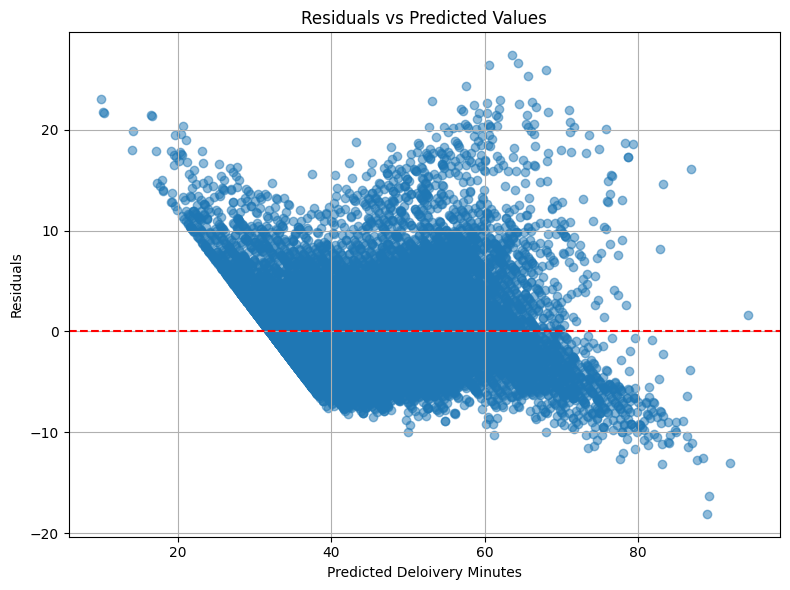

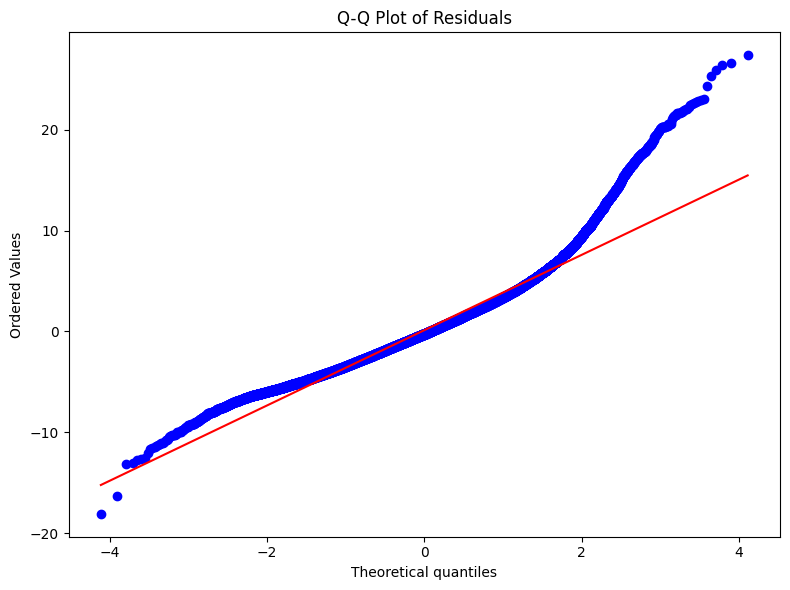

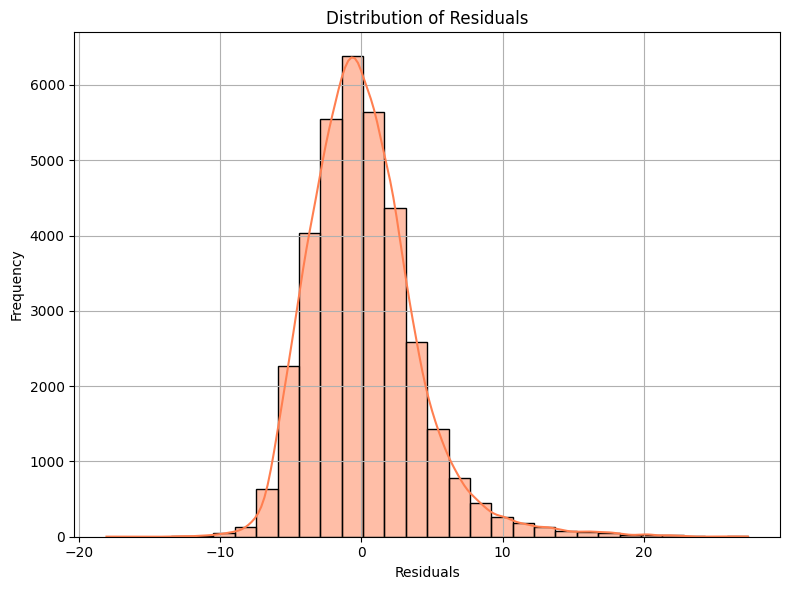

In [89]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import scipy.stats as stats

# Residuals
residuals = y_test - y_pred_rfe

# Residuals vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rfe, residuals, alpha=0.5, colorizer='teal')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Deloivery Minutes")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()


#Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, plot=plt, dist = 'norm')
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

#Residual Histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='coral', edgecolor='black')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [90]:
# Compare the scaled vs unscaled features used in the final model
#final model on scaled data
model_scaled = LinearRegression()
model_scaled.fit(x_train_rfe, y_train)

#store sacled coefficients
coefficients_scaled = pd.Series(model_scaled.coef_, index=x_train_rfe.columns)

#create unsacled version
X_train_unscaled = pd.read_csv('/content/drive/MyDrive/Upgrad 2025-2027/Machine Learning/Linear Regression/Assignment/porter_data_1.csv') #original dataset
X_train_unscaled['delivery_minutes'] = (pd.to_datetime(X_train_unscaled['actual_delivery_time']) - pd.to_datetime(X_train_unscaled['created_at'])).dt.total_seconds() / 60

# Extract the hour and day of week from the 'created_at' timestamp for unscaled data
X_train_unscaled['order_day'] = pd.to_datetime(X_train_unscaled['created_at']).dt.dayofweek  # Monday=0, Sunday=6

# Create a categorical feature 'isWeekend' for unscaled data
X_train_unscaled['isWeekend'] = X_train_unscaled['order_day'].apply(lambda x: 1 if x >= 5 else 0)


#Select revelant columns and fit again
features_to_use = selected_features
X_train_unscaled_filtered = X_train_unscaled[features_to_use]
y_unscaled = X_train_unscaled['delivery_minutes']

model_unscaled = LinearRegression()
model_unscaled.fit(X_train_unscaled_filtered, y_unscaled)

#store unscaled coefficients
coefficients_unscaled = pd.Series(model_unscaled.coef_, index=X_train_unscaled_filtered.columns)

#Compare
comparison_df = pd.DataFrame({'Scaled Coefficients': coefficients_scaled, 'Unscaled Coefficients': coefficients_unscaled}).round(3)
comparison_df

Scaled Coefficients  Unscaled Coefficients
market_id                              -0.554                 -0.645
order_protocol                         -0.768                 -0.768
subtotal                                2.798                  0.002
total_onshift_dashers                 -11.148                 -0.342
total_busy_dashers                     -4.383                 -0.147
total_outstanding_orders               16.964                  0.353
distance                                3.953                  0.478
isWeekend                               1.318                  1.052

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [91]:
# Analyze the effect of a unit change in a feature, say 'distance'
impact = comparison_df.loc['distance']
print(f'A unit change in distance leads to approx {impact["Unscaled Coefficients"]:.2f} minutes change in delivery time')

A unit change in distance leads to approx 0.48 minutes change in delivery time


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, the categorical variables in the dataset include market_id, order_protocol, and isWeekend.
- From the distribution analysis, it was evident that certain market_id values corresponded to shorter average delivery times, indicating possible location-based efficiency.
- order_protocol had varying means, showing some delivery types (e.g., scheduled vs immediate) impact time differently.
- isWeekend showed slightly higher delivery times, suggesting traffic or demand spikes.




---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>It means 20% of the total dataset was used as the validation/test set to evaluate model performance, while 80% was used to train the model.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>From the correlation matrix, distance had the highest positive correlation with delivery_minutes, indicating that longer travel distances naturally lead to longer delivery durations.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>Outliers were visualized using boxplots and detected using the 99th percentile rule. The remove_outliers() function was applied to numerical columns to filter out records beyond the upper threshold. This helped reduce noise and improve model generalization.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Based on coefficient analysis and RFE selection, the top 3 features were:
- total_outstanding_orders
- distance
- isWeekend
>These showed the strongest influence on delivery time predictions



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression models the relationship between independent variables and a continuous target variable using the formula:
𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + 𝛽₂𝑥₂ + … + 𝛽ₙ𝑥ₙ + ε
It estimates coefficients (𝛽) to minimize the residual error between actual and predicted values by minimizing the cost function (typically Mean Squared Error). It's based on assumptions of linearity, normality, and constant variance of residuals.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>- Simple linear regression has one independent variable predicting the target.
- Multiple linear regression uses two or more independent variables.
The latter captures more complex relationships and generally performs better on real-world datasets.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>
The cost function quantifies the error in predictions.
Commonly, it's the Mean Squared Error (MSE):
MSE = 1/n ∑(𝑦ᵢ − ŷᵢ)²
Minimization is done using Ordinary Least Squares (OLS), which finds the coefficient set that minimizes total error across all training samples.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>- Overfitting: Model fits training data too well, but performs poorly on unseen data due to capturing noise.
- Underfitting: Model fails to capture relationships, leading to poor performance on both train and test data.
Good regularization and validation strategy help avoid both.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>- A residuals vs predicted plot checks linearity and homoscedasticity — residuals should be randomly spread.
- A Q-Q plot checks normality of residuals.
- A histogram reveals skewness and outlier behavior.
If residuals show patterns, it may indicate model misfit, non-linearity, or feature issues.